In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
from ipywidgets import interact
from functools import partial
%matplotlib inline

In [17]:
# define our quadratic function
def f(x):
    return 3*x**2 - 4*x + 5

In [18]:
# verification
assert f(1) == 3*1**2 - 4*1 + 5
f(1)

4

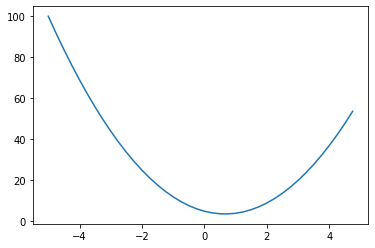

In [19]:
# plot the function
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

## Partial derivative w.r.t single variable

**definition of being differentiable**::
$${\displaystyle L=\lim _{h\to 0}{\frac {f(x+h)-f(x)}{h}}}$$

In other words,  it is the limit as `h` goes to 0 of
$${\frac {f(x+h)-f(x)}{h}}$$

**RQ**: What it's saying is if you're at some point `x` 
that you're interested in, and if you slightly increase it by
small number `h`, how does the function respond and with what sensitivity does it respond. So what we really want to know is what is the slope at that point; does the function go up or does it go down? and by how much? 

So we can basically evaluate the derivative here numerically by taking a very small `h`. Of course the definition would ask us to take an `h` value of 0 but we're just going to pick a very small `h`, let's say     0.001, and let's say we're interested in point 3.0. 
We look at `f(x)` for `x=3` and see the value is `20`. so if we nudge `x` by a very small amount `h`, how will the function respond?

In [20]:
# check derivate at x = 3 --> nugding up leads to increase in value
h = 0.0001
x = 3
slope = (f(x+h)-f(x))/h

print(f"The slope for f(x) at x = 3 is {slope :.3f}")

The slope for f(x) at x = 3 is 14.000


In [21]:
# check derivate at x = -3 --> nugding up leads to decrease in value
h = 0.0001
x = -3
slope = (f(x+h)-f(x))/h

print(f"The slope for f(x) at x = -3 is {slope:.3f}")

The slope for f(x) at x = 3 is -22.000


In [22]:
# check derivate at x = 2/3 --> nugding up leads to no change in value 
h = 0.0001
x = 2/3
slope = (f(x+h)-f(x))/h

print(f"The slope for f(x) at x = 2/3 is {slope:.3f}")

The slope for f(x) at x = 3 is 0.000


In [103]:
# Double check result w/ pytorch
# pour differentes valeures de x
x = torch.tensor([3.0,-3.0,2/3], requires_grad=True)
# pour une fonction f donnee  
y = 3*x**2 - 4*x + 5

gradients = torch.autograd.grad(y, x, create_graph=True, retain_graph=True, grad_outputs=torch.ones_like(x))
gradients

(tensor([ 14., -22.,   0.], grad_fn=<AddBackward0>),)

#### Getting gradients for more than just a scalar

**Side note sur torch.autograd.grad**:
torch.autograd.grad is a function in PyTorch that allows you to compute the gradients of a tensor with respect to one or more inputs. The function takes in the following arguments:

1. A `callable` (e.g. a function or a neural network model), which represents the computation that you want to compute the gradients of.
2. A `tensor`or a sequence of tensors that you want to compute the gradients with respect to.
3. `grad_outputs`: A tensor or a sequence of tensors representing the gradient of the output with respect to the input.
4. `retain_graph` (default=False): A Boolean that tells PyTorch whether to keep the computation graph around after the gradients have been computed.
5. `create_graph` (default=False): A Boolean that tells PyTorch whether to create a computation graph of the gradients.

The function returns a tuple of the same length as the inputs argument, containing the gradients of the callable with respect to each input tensor.

It's used when you need more control over the backward pass or when you need to compute gradients on non-scalar output. In other words, it's a more flexible and powerful way to calculate gradients as compared to backward() method. It is useful when you want to apply gradients on one output multiple times.

# Partial derivative w.r.t multiple variables

In order to evaluate this derivative we're going to get a bit hacky here:

 We're going to again have a very small value of `h` and then we're going to fix the inputs at some values that we're interested in (`a`,`b` and `c`).

After that we're going to be evaluating the the derivative of `d` with respect to `a`, `b` and `c` at that point. 

1. First we'll look at the derivative of `d` with respect to `a`; so we'll take `a`and we'll bump it by `h` and compare it to d2 which is the exact same function without the bump.

In [95]:
# our bump
h = 0.0001

# inputs at which we'll evaluate the derivative of d with respect to a, b and c.
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [96]:
# equation for d1 (adding h to a), so partial derivative of d with respect to a
d1 = a*b + c
a += h

# equation for d2 (without adding h to a)
d2 = a*b + c

print(f"d1 : {d1}")
print(f"d2 : {d2}")
# difference between d2 and d1, normalized by h, with respect to a
print(f"slope (gradient): {(d2-d1)/h:.3f}")

d1 : 4.0
d2 : 3.999699999999999
slope (gradient): -3.000


In [97]:
# equation for d1 (adding h to a), so partial derivative of d with respect to b
d1 = a*b + c
b += h

# equation for d2 (without adding h to b)
d2 = a*b + c

print(f"d1 : {d1}")
print(f"d2 : {d2}")
# difference between d2 and d1, normalized by h, with respect to b
print(f"slope (gradient): {(d2-d1)/h:.3f}")

d1 : 3.999699999999999
d2 : 3.99990001
slope (gradient): 2.000


In [98]:
# equation for d1 (adding h to a), so partial derivative of d with respect to c
d1 = a*b + c
c += h

# equation for d2 (without adding h to c)
d2 = a*b + c

print(f"d1 : {d1}")
print(f"d2 : {d2}")
# difference between d2 and d1, normalized by h, with respect to c
print(f"slope  (gradient): {(d2-d1)/h:.3f}")

d1 : 3.99990001
d2 : 4.00000001
slope  (gradient): 1.000


In [ ]:
# step by step.
a = torch.tensor(2.0).requires_grad_()
b = torch.tensor(-3.0).requires_grad_()
c = torch.tensor(10.0).requires_grad_()
d = a*b + c
d.backward()
print(f"slope  (gradient) with respect to a: {a.grad}")
print(f"slope  (gradient) with respect to b: {b.grad}")
print(f"slope  (gradient) with respect to c: {c.grad}")

slope  (gradient) with respect to a: -3.0
slope  (gradient) with respect to a: 2.0
slope  (gradient) with respect to a: 1.0


In [168]:
# # all together
# abc = torch.tensor([2.0,-3.0,10.0], requires_grad=True)

# def linear_fn(inpt): 
#     # unpack the input
#     a,b,c = inpt
#     return a*b + c
# # create computational graph
# d = linear_fn(abc)
# # compute gradients
# d.backward()
# # obtain gradients
# abc.grad

# print(f"slope  (gradient) with respect to a: {abc.grad[0]}")
# print(f"slope  (gradient) with respect to b: {abc.grad[1]}")
# print(f"slope  (gradient) with respect to c: {abc.grad[2]}")

However, we can't write out neural networks as mathematical expressions, they'd be monstrous, so instead what we're going to do is build a `Value Object`.

In [169]:
class Value:
    def __init__(self, data):
        self.data = data
    
    #  decide of the output string representation of data  
    # in human readable format 
    def __repr__(self) -> str:
        return f"Value(data={self.data})"

In [170]:
a = Value(2.0)
a

Value(data=2.0)

In [171]:
# what if we want to add two Value objects?
a = Value(2.0)
b = Value(3.0)

try:
    c = a + b
    
except Exception as e:
    print(e)
    print(f"We have not implemented additions between two Value objects (yet!!)")

else:
    print(c)
    print("We have succesfully added two Value objects!!")

unsupported operand type(s) for +: 'Value' and 'Value'
We have not implemented additions between two Value objects (yet!!)


### Adding an __add__ method

In [1]:
class Value:
    def __init__(self, data):
        self.data = data
    
    #  decide of the output string representation of data   
    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    # define addition
    def __add__(self, other):
        # creer un nouvel object Value qui contient la somme des deux
        summation = Value(self.data + other.data)
        return summation

In [2]:
# Now that we have added the __add__ method, we can add two Value objects.
a = Value(2.0)
b = Value(3.0)

try:
    c = a+b
except Exception as e:
    print(e)
    print(f"We have not implemented additions between two Value objects (yet!!)")

else:
    print(c)
    print("We have succesfully added two Value objects!!")

Value(data=5.0)
We have succesfully added two Value objects!!


### Adding a __mult__ method

In [3]:
# define multiplication
def __mul__(self, other):
    mult = Value(self.data * other.data)
    return mult

In [7]:
# monkey patch it to our Value class
Value.__mul__ = __mul__

In [9]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
print(a*b + c)
print((a.__mul__(b).__add__(c)))

Value(data=4.0)
Value(data=4.0)


So now what we are missing is the connective tissue of this expression. We want to build a computational graph so we need to know and
keep pointers about what values produce what other values so here for example we are going to
introduce a new variable which we'll call children and by default it will be an empty tuple. Then we will keep a
slightly different variable in the class which we'll call underscore prev which will be the set of children.

In [9]:
class Value :

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        # tuple turned into set for efficiency
        self._prev = set(_children)
        # by default _op is the empty set for leaf nodes
        self._op = _op
  
    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        # now we store the children in the new Value object to keep track of them on the computational graph
        # the children are the initial Value objects that were used to create the new Value object
        summation = Value(self.data + other.data, _children=(self, other), _op="+")
        return summation

    def __mul__(self, other):
        # now we store the children in the new Value object to keep track of them on the computational graph
        # the children are the initial Value objects that were used to create the new Value object
        mult = Value(self.data * other.data, _children=(self, other), _op="*")
        return mult


In [10]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b
e = d + c

In [14]:
print(f"Children : {d._prev} || Operation applied : {d._op}")
print(f"Children : {e._prev} || Operation applied : {e._op}")

Children : {Value(data=-3.0), Value(data=2.0)} || Operation applied : *
Children : {Value(data=-6.0), Value(data=10.0)} || Operation applied : +


In [12]:
d._op

'*'

## Visualizing the code

# Section a part.

In [ ]:
def g(x): 
    return a*x + c

def plot_function(function, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, function(x), color)
    if title is not None: plt.title(title)

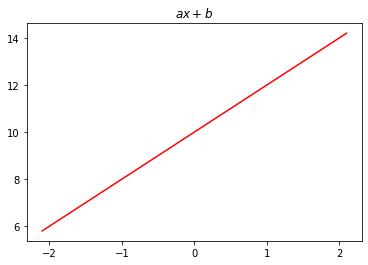

In [ ]:
plot_function(g, "$ax + b$")

In [ ]:
def quadratic(a, b, c, x):
    return a*x**2 - b*x + c

In [ ]:
def create_quadratic(a, b, c):
    # here we want to fix particular values of a, b, and c. 
    # To fix values passed to a function in python, we use the `partial` function
    # Now the only value that can be passed to this function is x
    return partial(quadratic, a, b, c)

In [ ]:
f1 = create_quadratic(a=5, b=1 ,c=1)

In [ ]:
# What is the value of f1, for x = 0, a=5, b=1 and c=1
f1(0)

1

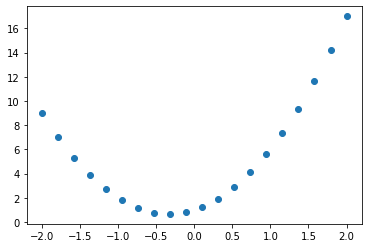

In [ ]:
# create our X
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
plt.scatter(x,f(x))

In [ ]:
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [ ]:
@interact(a=(1, 10), b=(-5, 5), c=(-10, 10))
def plot_quadratic(a, b, c):
    x = np.arange(-10, 10)
    y = [a*i**2 + b*i + c for i in x]
    plot_function(create_quadratic(a,b,c), ylim=(-3,13))
    plt.show()

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=0, description='b', …